# BASE

In [3]:
import func
file_path = 'E-n23-k3.evrp'  # Change this to your file path
evrp_data = func.read_evrp_file(file_path)
evrp_data

{'COMMENT': 'Modificatification of E-n23-k3 instance. Modified by Mavrovouniotis Menelaou.',
 'OPTIMAL_VALUE': 573.130948,
 'VEHICLES': 3,
 'DIMENSION': 23,
 'STATIONS': 9,
 'CAPACITY': 4500,
 'ENERGY_CAPACITY': 190.0,
 'ENERGY_CONSUMPTION': 1.2,
 'NODE_COORD_SECTION': {1: (266.0, 235.0),
  2: (295.0, 272.0),
  3: (301.0, 258.0),
  4: (309.0, 260.0),
  5: (217.0, 274.0),
  6: (218.0, 278.0),
  7: (282.0, 267.0),
  8: (242.0, 249.0),
  9: (230.0, 262.0),
  10: (249.0, 268.0),
  11: (256.0, 267.0),
  12: (265.0, 257.0),
  13: (267.0, 242.0),
  14: (259.0, 265.0),
  15: (315.0, 233.0),
  16: (329.0, 252.0),
  17: (318.0, 252.0),
  18: (329.0, 224.0),
  19: (267.0, 213.0),
  20: (275.0, 192.0),
  21: (303.0, 201.0),
  22: (208.0, 217.0),
  23: (326.0, 181.0),
  24: (229.0, 198.0),
  25: (229.0, 230.0),
  26: (229.0, 262.0),
  27: (269.0, 198.0),
  28: (269.0, 230.0),
  29: (269.0, 262.0),
  30: (309.0, 198.0),
  31: (309.0, 230.0),
  32: (309.0, 262.0)},
 'DEMAND_SECTION': {1: 0,
  2: 125,

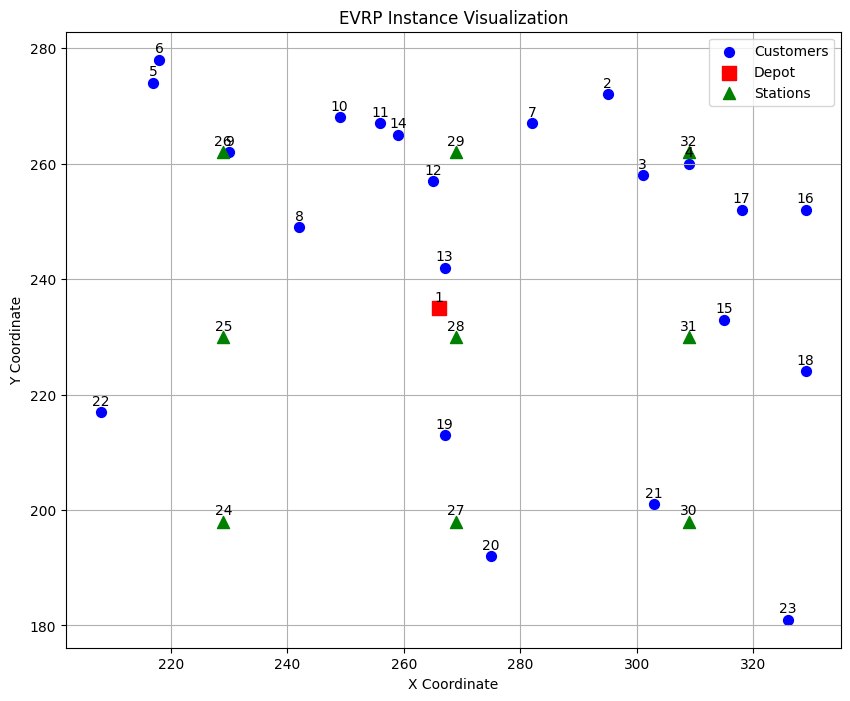

In [4]:
func.plot_evrp_instance(evrp_data)

Rota Atual: [ 1  7 11 13  1  3 15 22  2 20  8 23 12 21  1  9 10 19 14 16  4 18  6 17
  5  1]
Rota codificada: [0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1]
Rota decodificada: [ 1  7 11 13  1  3 15 22  2 20  8 23 12 21  1  9 10 19 14 16  4 18  6 17
  5  1]
Igual?: True
Distância total percorrida: 1551.67


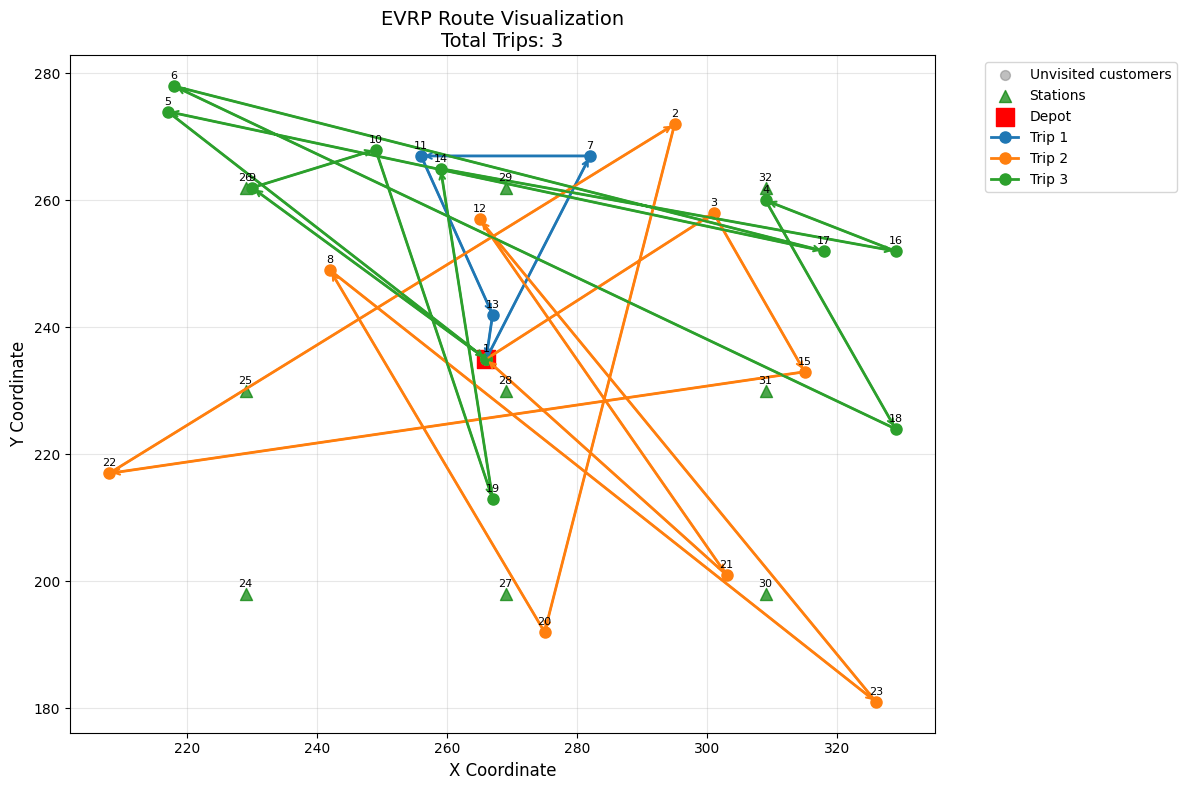

In [5]:
import numpy as np
rota = func.gerar_rota_unica_com_multiplas_viagens(22)
cod = func.codifica_rota(rota)
dec = func.decodifica_rota(cod)

print(f"Rota Atual: {rota}")
print(f"Rota codificada: {cod}")
print(f"Rota decodificada: {dec}")
print(f"Igual?: {np.array_equal(rota, dec)}")

distancia = func.calcular_distancia_total(evrp_data, rota)
print(f"Distância total percorrida: {distancia:.2f}")
func.plot_single_route_with_trips(evrp_data, rota)

# GA


## 1. Inicialização
Objetivo: Gerar soluções iniciais viáveis.

Método Único: Gerar Rotas

In [ ]:
import math
import random

n_pop = 

In [7]:
clientes = evrp_data['DIMENSION']-1
populacao = [func.gerar_rota_unica_com_multiplas_viagens(clientes) for _ in range(clientes)]
rota_ex = populacao[0]
rota_ex

array([ 1,  6,  9, 15,  5, 13, 10, 22, 11,  3,  7, 18, 17, 21,  4,  1, 20,
       16,  2, 14,  8, 23,  1, 12, 19,  1])

## 2. Avaliação (Fitness)

Objetivo: Medir a qualidade de cada rota.

In [30]:
def avaliacao_distancia_direta(populacao, data):
    """
    Avaliação por distância euclidiana pura.
    - Retorna: {rota: probabilidade} onde probabilidade é inversamente proporcional à distância.
    - Garante que as rotas são tuplas de inteiros nativos (int).
    """
    distancias = {}
    for rota in populacao:
        # Converte a rota para tupla de inteiros nativos
        rota_tuple = tuple(int(node) for node in rota)
        distancia = 0.0
        coords = data['NODE_COORD_SECTION']
        for i in range(len(rota) - 1):
            x1, y1 = coords[rota[i]]
            x2, y2 = coords[rota[i + 1]]
            distancia += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distancias[rota_tuple] = distancia

    # Inverte as distâncias para probabilidades
    inv_distancias = {rota: 1 / (dist + 1e-6) for rota, dist in distancias.items()}
    total = sum(inv_distancias.values())
    return {rota: inv_dist / total for rota, inv_dist in inv_distancias.items()}

In [33]:
def avaliacao_rankeamento(populacao, data):
    """
    Avaliação por posição no ranking.
    - Retorna: {rota: probabilidade} baseada em rank (melhor rota = maior probabilidade).
    - Usa tuplas de inteiros nativos.
    """
    # Calcula distâncias e armazena como tuplas de int
    distancias = {
        tuple(int(node) for node in rota): sum(
            math.sqrt((data['NODE_COORD_SECTION'][rota[i + 1]][0] - data['NODE_COORD_SECTION'][rota[i]][0])**2 + 
                     (data['NODE_COORD_SECTION'][rota[i + 1]][1] - data['NODE_COORD_SECTION'][rota[i]][1])**2)
            for i in range(len(rota) - 1)
        )
        for rota in populacao
    }
    
    # Ordena rotas pela distância
    rotas_ordenadas = sorted(distancias.keys(), key=lambda x: distancias[x])
    
    # Atribui probabilidades por rank (melhor rank = maior probabilidade)
    pesos = [len(populacao) - i for i in range(len(populacao))]
    total_pesos = sum(pesos)
    return {rota: peso / total_pesos for rota, peso in zip(rotas_ordenadas, pesos)}

In [34]:
def avaliacao_penalizacao(populacao, data):
    """
    Avaliação com penalidades por violação de restrições.
    - Retorna: {rota: probabilidade} considerando distância + penalidades.
    - Garante tuplas de inteiros nativos.
    """
    scores = {}
    for rota in populacao:
        rota_tuple = tuple(int(node) for node in rota)
        distancia = 0.0
        coords = data['NODE_COORD_SECTION']
        for i in range(len(rota) - 1):
            x1, y1 = coords[rota[i]]
            x2, y2 = coords[rota[i + 1]]
            distancia += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        
        # Exemplo fictício de penalização (ajuste conforme suas restrições)
        penalidade = 0
        if 'DEMAND_SECTION' in data:
            demanda_total = sum(data['DEMAND_SECTION'].get(node, 0) for node in rota)
            if demanda_total > 500:  # Capacidade máxima fictícia
                penalidade += 1000
        
        scores[rota_tuple] = distancia + penalidade

    # Inverte os scores para probabilidades
    inv_scores = {rota: 1 / (score + 1e-6) for rota, score in scores.items()}
    total = sum(inv_scores.values())
    return {rota: inv_score / total for rota, inv_score in inv_scores.items()}

In [42]:
print("Distância Direta:", avaliacao_distancia_direta(populacao, evrp_data))
print("Rankeamento:", avaliacao_rankeamento(populacao, evrp_data))
print("Penalização:", avaliacao_penalizacao(populacao, evrp_data))

probabilidades = avaliacao_rankeamento(populacao, evrp_data)

Distância Direta: {(1, 6, 9, 15, 5, 13, 10, 22, 11, 3, 7, 18, 17, 21, 4, 1, 20, 16, 2, 14, 8, 23, 1, 12, 19, 1): 0.048090669471688205, (1, 4, 1, 14, 17, 7, 21, 3, 16, 18, 12, 15, 5, 9, 1, 10, 23, 8, 11, 20, 19, 6, 2, 13, 22, 1): 0.04512585187921327, (1, 13, 4, 3, 23, 16, 11, 20, 7, 6, 9, 8, 14, 19, 22, 1, 17, 15, 1, 5, 2, 12, 18, 10, 21, 1): 0.0478975971219052, (1, 18, 13, 14, 7, 23, 5, 8, 11, 22, 10, 3, 20, 6, 21, 1, 12, 9, 16, 19, 1, 15, 4, 17, 2, 1): 0.045074689830076134, (1, 9, 21, 16, 8, 5, 1, 19, 22, 6, 13, 14, 23, 3, 15, 11, 12, 7, 2, 17, 18, 20, 10, 1, 4, 1): 0.04985524433684832, (1, 8, 20, 1, 19, 1, 6, 15, 9, 17, 21, 2, 23, 16, 5, 3, 10, 7, 13, 12, 14, 11, 18, 22, 4, 1): 0.04175017110208935, (1, 18, 15, 22, 23, 3, 4, 12, 16, 20, 1, 21, 7, 19, 14, 13, 1, 10, 6, 2, 8, 9, 5, 11, 17, 1): 0.0495059032183577, (1, 16, 1, 18, 20, 17, 19, 14, 9, 11, 2, 12, 1, 21, 3, 13, 6, 7, 10, 15, 22, 4, 8, 23, 5, 1): 0.04057416270478633, (1, 3, 21, 17, 11, 6, 4, 19, 5, 16, 20, 14, 10, 1, 22, 8, 9, 

## 3. Seleção de Pais

Objetivo: Escolher os melhores indivíduos para reprodução.

In [38]:
def selecao_roleta(probabilidades, num_pais):
    """
    Seleção por roleta.
    - probabilidades: dicionário {rota: probabilidade} (soma = 1.0)
    - num_pais: número de pais a selecionar.
    Retorna: lista de rotas selecionadas.
    """
    rotas, probs = zip(*probabilidades.items())
    return random.choices(rotas, weights=probs, k=num_pais)

In [39]:
def selecao_torneio(probabilidades, num_pais, tamanho_torneio=2):
    """
    Seleção por torneio.
    - tamanho_torneio: número de indivíduos que competem em cada torneio.
    Retorna: lista de rotas selecionadas.
    """
    rotas = list(probabilidades.keys())
    pais = []
    for _ in range(num_pais):
        competidores = random.sample(rotas, tamanho_torneio)
        vencedor = max(competidores, key=lambda x: probabilidades[x])  # Melhor fitness
        pais.append(vencedor)
    return pais

In [40]:
def selecao_rank(probabilidades, num_pais):
    """
    Seleção por rank linear.
    - Assume que 'probabilidades' já está normalizado (0 a 1).
    Retorna: lista de rotas selecionadas.
    """
    rotas_ordenadas = sorted(probabilidades.keys(), key=lambda x: probabilidades[x], reverse=True)
    pesos = [i for i in range(len(rotas_ordenadas), 0, -1)]  # Peso linear decrescente
    total = sum(pesos)
    probs = [p / total for p in pesos]
    return random.choices(rotas_ordenadas, weights=probs, k=num_pais)

Ordem de Execução no GA
1. **Inicialização**: Gere a população inicial.
2. **Avaliação**: Calcule a distância total de cada rota.
3. **Seleção**: Escolha os pais para reprodução.
4. **Recombinação**: Aplique crossover nos pais selecionados.
5. **Mutação**: Introduza variações nos filhos.
6. **Substituição**: Atualize a população com os melhores indivíduos.
7. **Repita**: Volte para a etapa 2 até atingir o critério de parada.

Métodos Recomendados para Seu Caso
1. **Seleção**: Torneio Binário (simplicidade) ou Roleta (diversidade).
2. **Crossover**: Uniforme (para binário) ou One-Point (com reparo pós-crossover).
3. **Mutação**: Bit-Flip Controlado (respeitando a codificação do depósito).
4. **Substituição**: Elitismo (preserva as melhores rotas).

In [41]:
def selecao_elitismo(probabilidades, num_pais):
    """
    Seleção por elitismo (os 'num_pais' melhores).
    Retorna: lista das melhores rotas.
    """
    return sorted(probabilidades.keys(), key=lambda x: probabilidades[x], reverse=True)[:num_pais]

In [ ]:
pais_roleta = selecao_roleta(probabilidades, num_pais=10) 
pais_torneio = selecao_torneio(probabilidades, num_pais=10)
pais_rank = selecao_rank(probabilidades, num_pais=10)
pais_elitismo = selecao_elitismo(probabilidades, num_pais=10)

print(f"Roleta: {pais_roleta}")
print(f"Torneio: {pais_torneio}")
print(f"Rank: {pais_rank}")
print(f"Elitismo: {pais_elitismo}")

pais = pais_torneio

Roleta: [(1, 9, 5, 8, 1, 22, 7, 11, 10, 17, 1, 18, 6, 21, 4, 13, 19, 15, 12, 14, 3, 2, 16, 23, 20, 1), (1, 9, 5, 8, 1, 22, 7, 11, 10, 17, 1, 18, 6, 21, 4, 13, 19, 15, 12, 14, 3, 2, 16, 23, 20, 1), (1, 4, 1, 14, 17, 7, 21, 3, 16, 18, 12, 15, 5, 9, 1, 10, 23, 8, 11, 20, 19, 6, 2, 13, 22, 1), (1, 6, 9, 15, 5, 13, 10, 22, 11, 3, 7, 18, 17, 21, 4, 1, 20, 16, 2, 14, 8, 23, 1, 12, 19, 1), (1, 14, 23, 22, 18, 15, 12, 17, 20, 9, 3, 4, 6, 13, 11, 1, 8, 10, 19, 21, 2, 1, 7, 5, 16, 1), (1, 16, 14, 17, 18, 10, 13, 23, 20, 11, 22, 21, 12, 6, 8, 1, 7, 3, 2, 15, 4, 5, 1, 9, 19, 1), (1, 9, 21, 16, 8, 5, 1, 19, 22, 6, 13, 14, 23, 3, 15, 11, 12, 7, 2, 17, 18, 20, 10, 1, 4, 1), (1, 18, 13, 14, 7, 23, 5, 8, 11, 22, 10, 3, 20, 6, 21, 1, 12, 9, 16, 19, 1, 15, 4, 17, 2, 1), (1, 23, 13, 10, 22, 20, 16, 2, 21, 11, 8, 1, 7, 15, 17, 18, 19, 1, 14, 9, 3, 12, 5, 4, 6, 1), (1, 18, 13, 14, 7, 23, 5, 8, 11, 22, 10, 3, 20, 6, 21, 1, 12, 9, 16, 19, 1, 15, 4, 17, 2, 1)]
Torneio: [(1, 18, 15, 22, 23, 3, 4, 12, 16, 20, 1, 

## 4. Recombinação (Crossover)

Objetivo: Combinar partes de dois pais para gerar filhos.

Usar Bits de Representação para os valores. Usar um bit a mais que o normal

20 = 0 - 10100
13 = 0 - 01011
6  = 0 - 00110

010100 001011 000110
101000 111000 011000

32 4 7
20 6 13

In [62]:
def crossover_one_point(pai1, pai2):
    """
    Crossover em um ponto.
    - pai1, pai2: listas representando rotas (ex: [1, 2, 3, 1, 4, 1]).
    Retorna: dois filhos (listas).
    """
    ponto = random.randint(1, min(len(pai1), len(pai2)) - 1)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]
    return filho1, filho2

In [63]:
def crossover_two_point(pai1, pai2):
    """
    Crossover em dois pontos.
    Retorna: dois filhos.
    """
    tamanho = min(len(pai1), len(pai2))
    ponto1 = random.randint(1, tamanho - 2)
    ponto2 = random.randint(ponto1 + 1, tamanho - 1)
    filho1 = pai1[:ponto1] + pai2[ponto1:ponto2] + pai1[ponto2:]
    filho2 = pai2[:ponto1] + pai1[ponto1:ponto2] + pai2[ponto2:]
    return filho1, filho2

In [64]:
def crossover_ordenado(pai1, pai2):
    """
    Crossover ordenado (OX).
    - Garante que não há clientes repetidos nos filhos.
    Retorna: dois filhos.
    """
    def criar_filho(p1, p2):
        # Escolhe um segmento do pai1
        inicio = random.randint(0, len(p1) - 1)
        fim = random.randint(inicio + 1, len(p1))
        segmento = p1[inicio:fim]
        
        # Preenche o resto com os clientes do pai2 (sem repetir)
        filho = segmento + [node for node in p2 if node not in segmento and node != 1]
        return filho[:len(p1)]  # Mantém o tamanho original

    filho1 = criar_filho(pai1, pai2)
    filho2 = criar_filho(pai2, pai1)
    return filho1, filho2

In [65]:
def crossover_uniforme(pai1, pai2):
    """
    Crossover uniforme.
    - Cada cliente é escolhido de um dos pais aleatoriamente.
    Retorna: dois filhos.
    """
    filho1, filho2 = [], []
    for i in range(max(len(pai1), len(pai2))):
        if i < len(pai1) and i < len(pai2):
            if random.random() < 0.5:
                filho1.append(pai1[i])
                filho2.append(pai2[i])
            else:
                filho1.append(pai2[i])
                filho2.append(pai1[i])
        elif i < len(pai1):
            filho1.append(pai1[i])
        else:
            filho2.append(pai2[i])
    return filho1, filho2

In [ ]:
def reparar_rota(rota):
    """
    Remove clientes duplicados e garante que a rota comece/termine no depósito.
    """
    clientes_vistos = set()
    rota_reparada = [1]  # Começa no depósito
    for node in rota[1:-1]:  # Ignora o primeiro e último (depósito)
        if node != 1 and node not in clientes_vistos:
            rota_reparada.append(node)
            clientes_vistos.add(node)
    rota_reparada.append(1)  # Termina no depósito
    return rota_reparada

In [ ]:
filhos = []
for i in range(0, len(pais), 2):
    if i + 1 < len(pais):
        filho1, filho2 = crossover_ordenado(pais[i], pais[i+1])
        filhos.extend([filho1, filho2])

## 5. Mutação

Objetivo: Introduzir diversidade genética.

## 6. Substituição (Atualização da População)

Objetivo: Definir quem sobrevive para a próxima geração.